In [1]:
import pandas as pd

In [2]:
import numpy as np
np.random.seed(10)

In [3]:
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist

In [5]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [6]:
print('number of train data=', len(x_train_image))
print('number of test data=', len(x_test_image))

number of train data= 60000
number of test data= 10000


In [7]:
print('shape of train image=', x_train_image.shape)
print('shape of train label=', y_train_label.shape)
print('shape of test image=', x_train_image.shape)
print('shape of test label=', y_test_label.shape)

shape of train image= (60000, 28, 28)
shape of train label= (60000,)
shape of test image= (60000, 28, 28)
shape of test label= (10000,)


In [8]:
import matplotlib.pyplot as pyplot
def my_plot_image(input_image):
    fig = pyplot.gcf()
    fig.set_size_inches(2,2)
    pyplot.imshow(input_image, cmap='binary')
    pyplot.show()

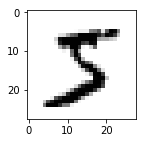

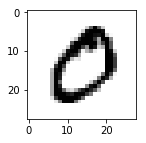

In [9]:
my_plot_image(x_train_image[0])
my_plot_image(x_train_image[1])
# my_plot_image(x_train_image[2])

In [10]:
print(y_train_label[0])
print(y_train_label[1])
# print(y_train_label[2])

5
0


In [11]:
import matplotlib.pyplot as pyplot
def my_plot_images_labels_prediction(input_images, input_labels, input_prediction, input_index, input_num=10):
    fig = pyplot.gcf()
    fig.set_size_inches(12,14)
    if input_num>10:
        input_num=10
    for i in range(0, input_num):
        ax = pyplot.subplot(5,5,1+i)
        ax.imshow(input_images[input_index], cmap='binary')
        title = "label=" + str(input_labels[input_index])
        if len(input_prediction)>0:
            title= title + ", predict=" + str(input_prediction[input_index])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        input_index = input_index + 1
    pyplot.show()

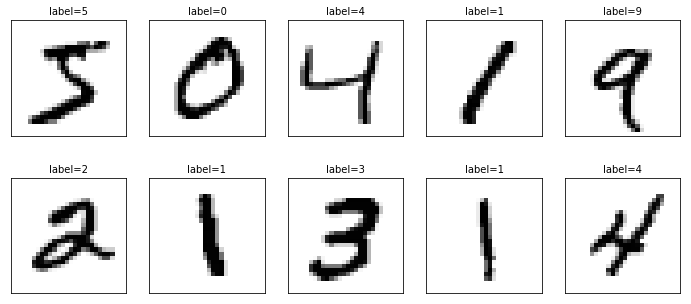

In [12]:
my_plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 15)

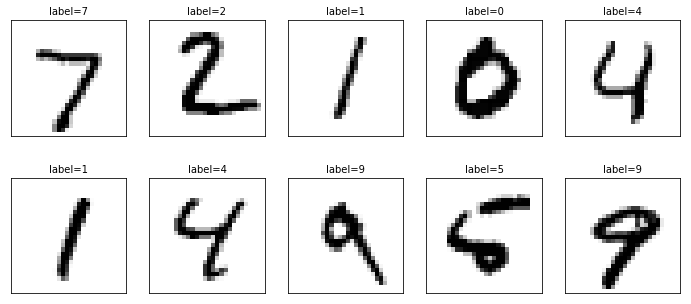

In [13]:
my_plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 15)

In [14]:
print('shape of train image=', x_train_image.shape)
print('shape of train label=', y_train_label.shape)

shape of train image= (60000, 28, 28)
shape of train label= (60000,)


In [15]:
reshape_dim = 28 * 28
x_train_reshaped = x_train_image.reshape(60000, reshape_dim).astype('float32')
x_test_reshaped = x_test_image.reshape(10000, reshape_dim).astype('float32')

In [16]:
print('x_train_reshaped=', x_train_reshaped.shape)
print('x_test_reshaped=', x_test_reshaped.shape)

x_train_reshaped= (60000, 784)
x_test_reshaped= (10000, 784)


In [17]:
print(x_train_reshaped[0])
# print(x_train_reshaped[1])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [18]:
x_train_normalized = x_train_reshaped / 255
x_test_normalized = x_test_reshaped / 255

In [19]:
print(x_train_normalized[0])
# print(x_train_normalized[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [20]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
y_train_oneHotEncoding = np_utils.to_categorical(y_train_label)
y_test_oneHotEncoding = np_utils.to_categorical(y_test_label)

In [22]:
y_train_oneHotEncoding[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)